## Monte Carlo Exploring Starts

1. Why we need MCES
   
The drawback of the MC Basic method is that it requires `generating many episodes` for each state-action pair and then averaging these episodes to obtain the action value. This makes the algorithm quite `inefficient`.

2. How can we imporve sampling efficiency?
   
In generating an episode, we obtain a series of state-action pair samples, but we typically calculate the action value for only the first state-action pair, effectively discarding the rest. To efficiently utilize the data, we can calculate the value of any state-action pair by using all subsequent state-action pairs appearing after it within the same episode. This approach significantly enhances data utilization efficiency.

3. Remark

In this code implementation, we choose to apply the every visit method.

And we try to improve the policy episode-by-episode.

<img src = 'MC_ExploringStarts.png' alt = 'MC_ExploringStarts' style="width: 700px; height: 450px;" />

In [1]:
import numpy as np
import random
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from GridWorld import GridWorld

c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
gamma = 0.9 
rows = 10
cols = 10
grid_world = GridWorld(rows, cols, forbiddenAreaNums=10)
grid_world.show()

⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️🚫⬜️🚫⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️🚫🚫⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️🚫⬜️⬜️🚫⬜️⬜️
⬜️⬜️⬜️⬜️⬜️🚫✅⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️


In [3]:
# Though in MC Basic the episode length is not fixed, we still need to set a maximum length for each episode to avoid infinite loop
episode_length = 100

state_values = np.zeros(rows*cols) 

# action value
qtable = np.zeros((rows*cols, 5)) 

# MC Basic method is just like policy iteration, we first need a random policy and then improve it
policy = np.eye(5)[np.random.randint(0,5,size=(rows*cols))]

grid_world.show_policy_matirx(policy)

Now policy:
🔄⬆️⬇️⬆️➡️⬆️⬆️⬇️⬇️🔄
⬆️⬆️🔄🔄🔄🔄⬅️🔄➡️⬇️
⬆️🔄⬇️⬅️🔄⬆️⬆️🔄🔄⬅️
🔄➡️⬇️⏪⬆️⬇️⬆️⬆️⬅️⬅️
⏫️🔄⬇️⬅️⬅️➡️⬅️⬇️⬆️⬅️
⬇️🔄➡️⬆️➡️⬅️⬇️⬆️⬆️⬅️
🔄⬇️➡️🔄⏩️⬆️⬆️⏩️🔄⬇️
➡️➡️➡️🔄⬅️⏫️✅🔄⬆️⬇️
🔄⬅️⬇️➡️⬇️🔄⬇️⬆️🔄⬇️
⬅️➡️⬇️⬇️⬆️⬆️➡️🔄⏫️➡️


-----------------------------------
q value update start at iteration: 0, threshold: [500.0]
-----------------------------------
q value update start at iteration: 1, threshold: [246.5954439779531]
-----------------------------------
q value update start at iteration: 2, threshold: [429.1938260309123]
-----------------------------------
q value update start at iteration: 3, threshold: [462.0098256915847]
-----------------------------------
q value update start at iteration: 4, threshold: [356.89736318708754]
-----------------------------------
q value update start at iteration: 5, threshold: [462.27102363010846]
-----------------------------------
q value update start at iteration: 6, threshold: [405.8751020771997]
-----------------------------------
q value update start at iteration: 7, threshold: [516.9296419545929]
-----------------------------------
q value update start at iteration: 8, threshold: [611.4010645108049]
-----------------------------------
q value update start at itera

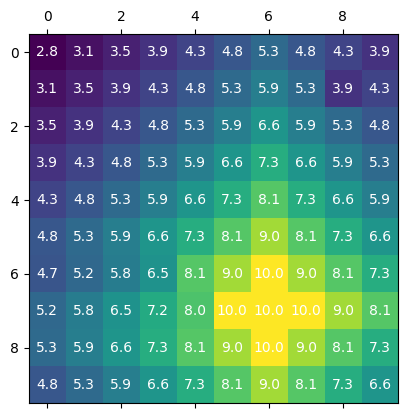

In [4]:
pre_qtabel = qtable.copy() + 1
threshold = 0.001
cut = 0
cut_threshold = 10000
# because in this method, just use one episode, may cause the q value not converge
# so we need to add a threshold to control the iteration and delete the threshold of q value because for each episode, the q value may not be updated
# or you can choose to set episode_length to a large number to make sure the q value converge
while cut < cut_threshold:
    print('-----------------------------------')
    print(f'q value update start at iteration: {cut}, threshold: [{np.sum((pre_qtabel-qtable)**2)}]')
    pre_qtabel = qtable.copy()

    # start from a random state and action
    now_state = random.randint(0, rows*cols - 1)
    now_action = random.randint(0, 4)

    # generate a episode
    episode = grid_world.get_episode_return(
        now_state=now_state,
        now_action=now_action,
        policy=policy,
        steps=episode_length
    )

    last_reward = episode[-1][2]

    # Policy Evaluation (PE)
    for k in range(episode_length - 1, -1, -1):
        # obtain the state, action, reward of each step
        now_state, now_action, now_reward, _, _ = episode[k]
        last_reward = now_reward + gamma * last_reward
        # update the qtable using the every-visit method
        qtable[now_state][now_action] = last_reward
    
    # Policy Improvement (PI)
    policy = np.eye(5)[np.argmax(qtable, axis=1)]

    cut += 1
print(f'Iteration Finished: {np.sum((pre_qtabel-qtable)**2)}')
print('Optimal Policy Found!')
print('Final Policy')
grid_world.show_policy_matirx(policy)
# according to the Bellman optimality equation, we can get the optimal state value
state_values = np.max(qtable, axis=1)
grid_world.show_state_value(state_values.reshape((rows, cols)))